In [1]:
import scvelo as scv
import scanpy as sc
import numpy as np
import loompy
import pandas as pd

In [2]:
adata = sc.read_h5ad('/Users/pbajpai/Library/CloudStorage/OneDrive-EmoryUniversity/pbajpai/KIT/Kit_10x/rds_obs/lung9s3_Aug252024.h5ad')

In [3]:
adata.obsm['X_umap']

array([[ 7.42206912, -8.41653241],
       [ 8.356216  , -5.74089707],
       [ 6.71281915, -7.48506535],
       ...,
       [-8.3872294 , -2.79118384],
       [-6.92256255, -2.61342276],
       [-8.73647065, -2.93275131]])

In [4]:
adata

AnnData object with n_obs × n_vars = 35976 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.hb', 'percent.rb', 'SampleID', 'Group', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet_classification_low_confidence', 'doublet_classification_high_confidence', 'doubletFinder_classification', 'label.main', 'label.fine', 'RNA_snn_res.0.16', 'RNA_snn_res.0.12', 'RNA_snn_res.0.2', 'label.main_new', 'RNA_snn_res.0.05', 'RNA_snn_res.0.03', 'RNA_snn_res.0.02', 'RNA_snn_res.0.025', 'RNA_snn_res.0.04', 'RNA_snn_res.0.1', 'label.manual', 'label.main_new2'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [6]:
adata.obs.columns = adata.obs.columns.str.replace(".","_", regex=False)
adata.obs.columns

Index(['orig_ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'percent_hb',
       'percent_rb', 'SampleID', 'Group', 'RNA_snn_res_0_5', 'seurat_clusters',
       'doublet_classification_low_confidence',
       'doublet_classification_high_confidence',
       'doubletFinder_classification', 'label_main', 'label_fine',
       'RNA_snn_res_0_16', 'RNA_snn_res_0_12', 'RNA_snn_res_0_2',
       'label_main_new', 'RNA_snn_res_0_05', 'RNA_snn_res_0_03',
       'RNA_snn_res_0_02', 'RNA_snn_res_0_025', 'RNA_snn_res_0_04',
       'RNA_snn_res_0_1', 'label_manual', 'label_main_new2'],
      dtype='object')

In [7]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_pcs=15, n_neighbors=15)
sc.tl.leiden(adata, resolution = 0.25)
sc.tl.umap(adata)

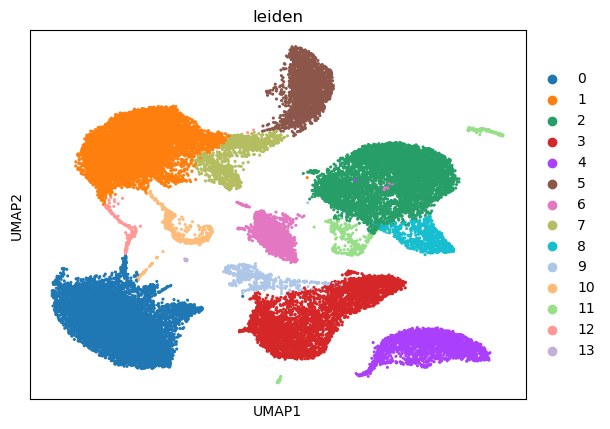

In [10]:
sc.pl.umap(adata, color='leiden', size=20)

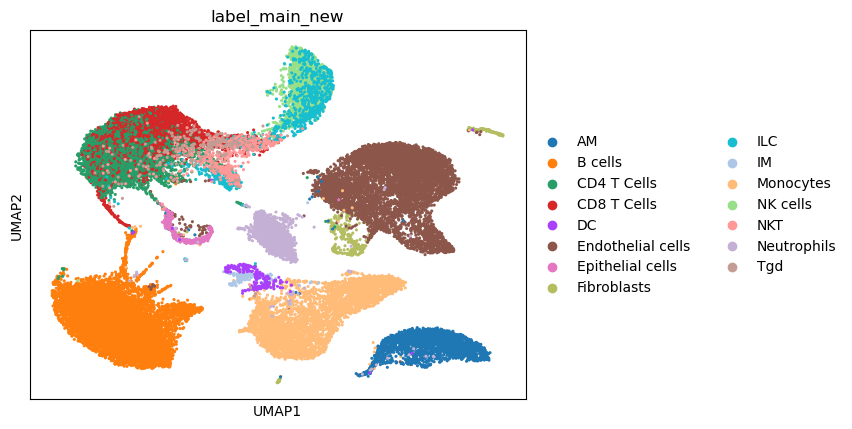

In [11]:
sc.pl.umap(adata, color='label_main_new', size=20)

In [13]:
adata.write_h5ad('lung9s3_adata_aug252024.h5ad')